In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
     print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
data=pd.read_csv("../input/iris/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.iloc[:, :4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [6]:
X=data.iloc[:, :4].values

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [8]:
kmeans= KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_labels=(kmeans.predict(X))
C= kmeans.cluster_centers_
sil=silhouette_score (X, cluster_labels, metric = 'euclidean', sample_size = len(X))
print(sil)
print(C)

0.5820898597618551
[[125.5     6.588   2.974   5.552]
 [ 25.5     5.006   3.418   1.464]
 [ 75.5     5.936   2.77    4.26 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

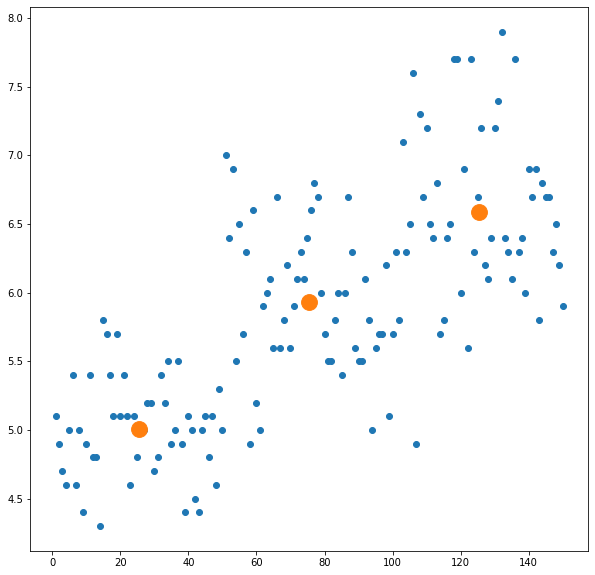

In [9]:
fig=plt.figure(figsize=(10,10))
plt.scatter(X[ :,0], X[:, 1])
plt.scatter(C[:,0], C[:,1], marker='.', s=1000)
plt.show